# 1.1 Fundamentos de la técnica

El algoritmo **k-Nearest Neighbors (kNN)** es uno de los métodos de clasificación más simples y efectivos.
Su principio básico es que los objetos similares tienden a estar cerca en el espacio de características.

Dado un nuevo punto de datos, el algoritmo:

1. Calcula la distancia entre el punto y todos los ejemplos del conjunto de
entrenamiento.

2. Selecciona los k vecinos más cercanos.

3. Asigna la clase más frecuente entre esos vecinos al nuevo punto.

Es un modelo no paramétrico, lo que significa que no aprende una función explícita durante el entrenamiento; en cambio, “memoriza” los datos y toma decisiones en el momento de la predicción.

# 1.2 Modelo Matemático

El modelo se basa en una medida de distancia, comúnmente la **distancia euclidiana**:
$$ d(x,x_i)=\sqrt{\sum_{j=1}^n(x_j−x_{ij})2} $$

Luego, para clasificar un nuevo ejemplo x:
$$\hat y=mode\left\{yi:xi∈Nk(x)\right\} $$

donde:
* $N_K(x)$: conjunto de los k vecinos más cercanos a x
* $\hat y$: clase predicha

# 1.3 Librerías, clases y funciones utilizadas
|Librería	|Función / Clase|	Descripción|
|-|-|-|
|pandas|	DataFrame|	Manipulación de datos tabulares|
|matplotlib.pyplot / seaborn	|scatterplot, pairplot	|Visualización de datos|
|sklearn.datasets	|load_iris	|Carga el dataset de ejemplo Iris|
|sklearn.model_selection|	train_test_split|	Divide los datos en conjuntos de entrenamiento y prueba|
|sklearn.preprocessing	|StandardScaler	|Estandariza los datos (media = 0, varianza = 1)|
|sklearn.neighbors|	KNeighborsClassifier|	Implementa el algoritmo kNN|
|sklearn.metrics|	confusion_matrix, accuracy_score	|Evalúan el rendimiento del modelo|

# 1.4 Pipeline
**1.4.1 Preprocesamiento de datos**

Resumen estadístico del dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


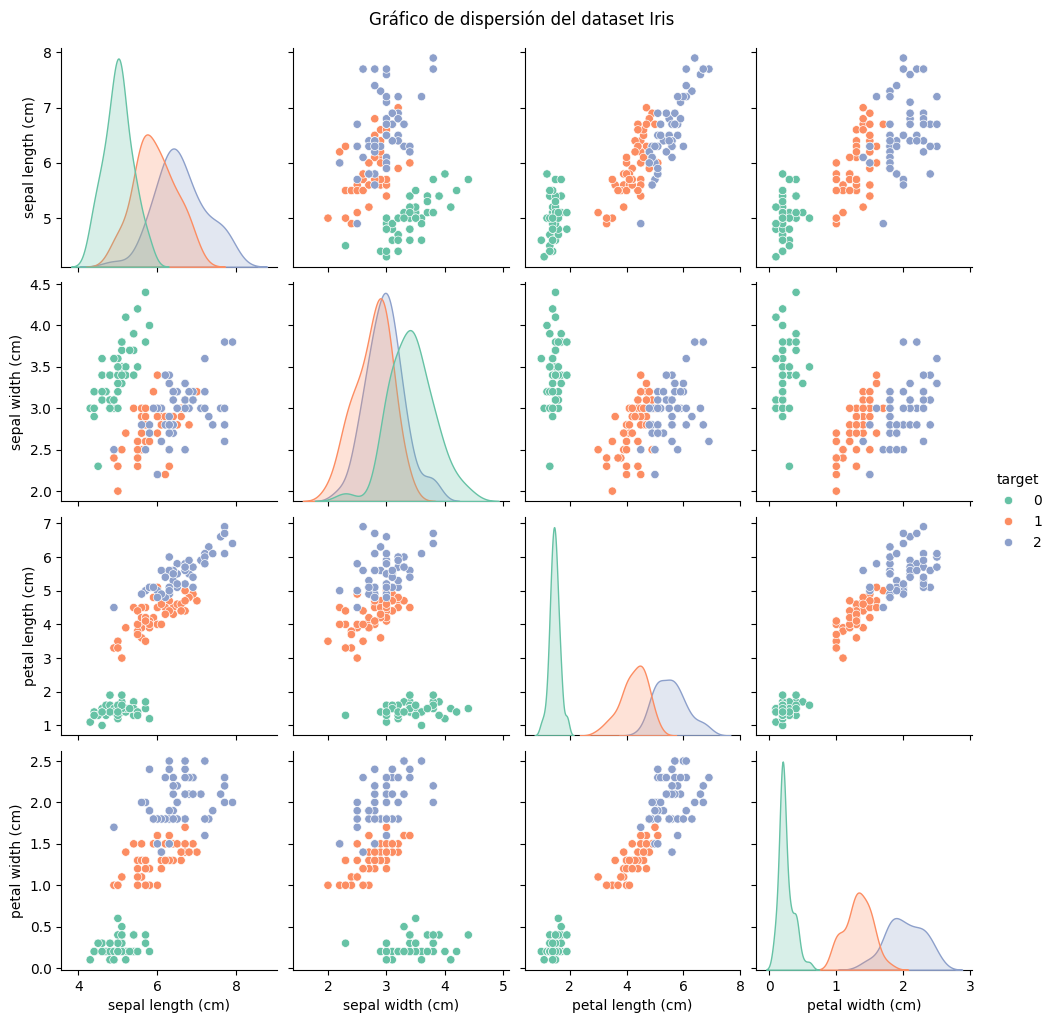

In [1]:
# Importar librerías
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

# Análisis estadístico
print("Resumen estadístico del dataset:")
display(X.describe())

# Añadir la columna de clase
df = X.copy()
df['target'] = y

# Gráfico de dispersión
sns.pairplot(df, hue='target', palette='Set2')
plt.suptitle("Gráfico de dispersión del dataset Iris", y=1.02)
plt.show()

**1.4.2 Feature Engineering**

Seleccionamos las variables predictoras (```sepal length```, ```sepal width```, ```petal length```, ```petal width```) y la variable objetivo (```target```), que representa el tipo de flor (Setosa, Versicolor o Virginica).

Las variables se escalan para evitar que las diferencias de magnitud afecten la distancia euclidiana.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**1.4.3 Selección del Modelo**

El modelo kNN se selecciona porque:

* Es intuitivo y fácil de implementar.

* No requiere entrenamiento intensivo.

* Es ideal para conjuntos de datos pequeños o con fronteras de decisión no lineales.

In [3]:
from sklearn.neighbors import KNeighborsClassifier

# Crear modelo kNN con k = 5
knn = KNeighborsClassifier(n_neighbors=5)

**1.4.4 Entrenamiento del Modelo**

In [4]:
# Entrenar el modelo
knn.fit(X_train_scaled, y_train)
print("Modelo entrenado con éxito.")

Modelo entrenado con éxito.


**1.4.5 Predicción**

Se crea una función para predecir la clase de un nuevo patrón.

In [5]:
def predecir_flor(nuevo_patron):
    """
    Recibe una lista con las 4 medidas de una flor
    y devuelve la clase predicha.
    """
    patron_escalado = scaler.transform([nuevo_patron])
    pred = knn.predict(patron_escalado)
    return iris.target_names[pred[0]]

# Ejemplo de prueba
nuevo = [5.8, 3.1, 5.0, 1.7]
print(f"Predicción para {nuevo}: {predecir_flor(nuevo)}")

Predicción para [5.8, 3.1, 5.0, 1.7]: versicolor


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**1.4.6 Evaluación del Modelo**

Evaluamos el modelo con Accuracy y la Matriz de Confusión.

Accuracy del modelo: 1.00


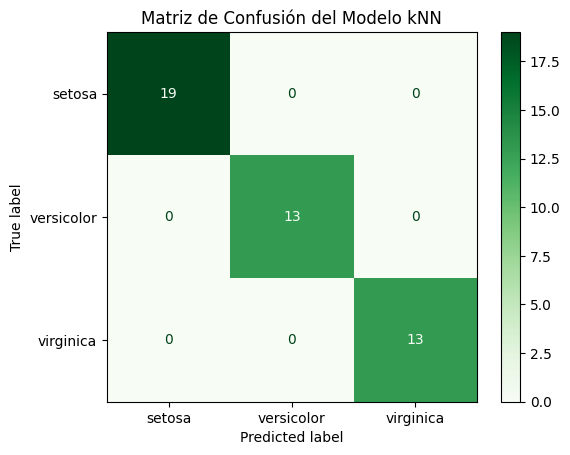

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Predicciones sobre el conjunto de prueba
y_pred = knn.predict(X_test_scaled)

# Cálculo de métricas
acc = accuracy_score(y_test, y_pred)
matriz = confusion_matrix(y_test, y_pred)

print(f"Accuracy del modelo: {acc:.2f}")

# Mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=iris.target_names)
disp.plot(cmap="Greens")
plt.title("Matriz de Confusión del Modelo kNN")
plt.show()

**1.4.7 Ajuste de Parámetro k**

Para elegir el valor óptimo de k, probamos varios valores y observamos el error de clasificación.

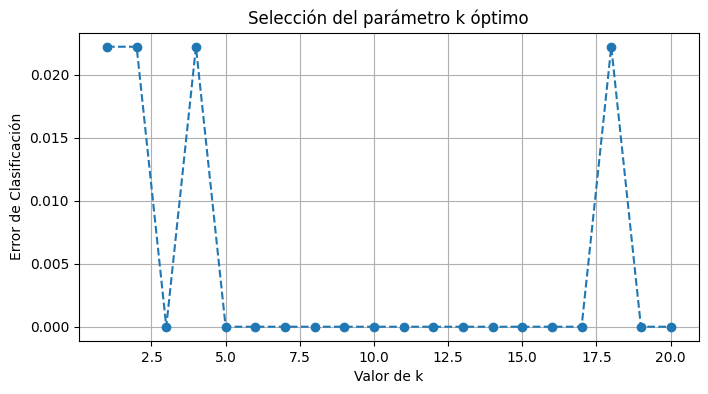

In [7]:
errors = []
k_values = range(1, 21)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    pred_k = model.predict(X_test_scaled)
    errors.append(1 - accuracy_score(y_test, pred_k))

plt.figure(figsize=(8, 4))
plt.plot(k_values, errors, marker='o', linestyle='dashed')
plt.title("Selección del parámetro k óptimo")
plt.xlabel("Valor de k")
plt.ylabel("Error de Clasificación")
plt.grid(True)
plt.show()

**Conclusión**

El clasificador kNN demostró ser altamente preciso con el conjunto de datos Iris.
Su simplicidad lo hace ideal para tareas de clasificación iniciales o como modelo base de comparación.
El valor de $k$ debe elegirse cuidadosamente, equilibrando el sesgo y la varianza.


---
\
**Referencias Bibliográficas**

* Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow. O’Reilly Media.

* Scikit-learn Documentation. https://scikit-learn.org/stable/

* Han, J., Kamber, M., & Pei, J. (2011). Data Mining: Concepts and Techniques. Morgan Kaufmann.

* Bishop, C. M. (2006). Pattern Recognition and Machine Learning. Springer.